In [1]:
import numpy as np
import csv as csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV ,StratifiedKFold

import numpy as np
import pylab as plt
from glob import glob
import argparse
import os
import progressbar
import pickle as pkl
from numpy.lib import stride_tricks
from skimage import feature
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time
import mahotas as mt

import tensorflow as tf
from datetime import datetime
from IPython import display
from tensorflow.keras.utils import Sequence
from keras import backend as K
import random
import cv2

import math

import multiprocessing

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
class DataGenerator(Sequence):
    def __init__(self, list_IDs,label_map , img_dir ,mode):
        'Initialization'
        self.list_IDs = list_IDs
        self.label_map = image_label_map
        self.on_epoch_end()
        self.img_dir = img_dir + "/images"
        self.mask_dir = img_dir + "/masks"
        self.mode = mode

    def __len__(self):
        return int(len(self.list_IDs))

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
    
    def __getitem__(self, index):
        'Generate one batch of data'
        indexes = self.indexes[index:(index+1)]
        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        # Generate data
        X, y = self.__data_generation(list_IDs_temp)
        return X, y    
    
    def __data_generation(self, list_IDs_temp):
        """Generates data containing batch_size samples"""
        if self.mode == "train":
            # Generate data
            X, y = self.load_file(list_IDs_temp)
            return X, y
        elif self.mode == "val":
            X, y = self.load_file(list_IDs_temp)
            return X, y        
        
    def load_file(self, id_list):
        list_IDs_temp = id_list
        for ID in list_IDs_temp:
            x_file_path = os.path.join(self.img_dir, ID)
            y_file_path = os.path.join(self.mask_dir, self.label_map.get(ID))
            # Store sample
            X = np.load(x_file_path)
            # Store class
            y = np.load(y_file_path).astype('float32')
        return X, y    

train_generator = DataGenerator(partition,image_label_map,out_train_data_dir, "train")
val_generator= DataGenerator(val_partition,val_image_label_map,out_val_data_dir, "val")

print( len(train_masks) , len(train_imgs) )

print(train_imgs[:3]

#re ,inp = load(PATH+'train/100.jpg')
#flips mask and input image
re_inp = DataGenerator(partition
                       ,image_label_map
                       ,out_train_data_dir
                       , "train")
val_re_inp= DataGenerator(val_partition
                          ,val_image_label_map
                          ,out_val_data_dir
                          , "val")

In [3]:
def read_data(img_npy ,image_dir ,label_npy ,label_dir):
    print ('[INFO] Reading image data.')
    image_list = []
    label_list = []
    
    '''for file in img_npy:        
        for batch in range( bs1 ):        
            for row in range( train_ds[batch][0][...].shape[0] ):
                print('.' , row , end='')
        
                x = os.path.join( image_dir ,file )
                x = np.load( x )
                image_list.append( x )'''
                          
    for file in img_npy:
        x1 = os.path.join( image_dir ,file )
        #print(x1)
        x2 = np.load( x1 )        
        x2 = np.int64(x2*255)
        bs1 = len(x2)
        
        for batch in range( bs1 ):        
            #for row in range( x2[batch][...].shape[0] ): 
            x3 = x2[batch]            
            image_list.append( x3 )                
            if (batch == 1) & (file == "image_file_24.npy"):
                print("trainshape: " ,x3.shape)  
                
    for file in label_npy:
        x1 = os.path.join( label_dir ,file )
        #print(x1)
        x2 = np.load( x1 )    
        x2 = np.int64(x2*255)
        bs1 = len(x2)
        
        for batch in range( bs1 ):        
            #for row in range( x2[batch][...].shape[0] ):  
            x3 = x2[batch]         
            label_list.append( x3 )
            if (batch == 1) & (file == "label_file_24.npy"):
                print("trainshape: " ,x3.shape)   
                
    
    '''for file in img_npy:
        x1 = os.path.join( image_dir ,file )
        x2 = np.load( x1 )
        image_list.append( x2 )
        
    for file in label_npy:
        x1 = os.path.join( image_dir ,file )
        x2 = np.load( x1 )
        label_list.append( x2 )'''

    return image_list, label_list

out_train_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/train'
out_val_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/val'

# ====================
# train set
# ====================
train_imgs = [s for s in os.listdir(out_train_data_dir + "/images/") if s.endswith('.npy')]
train_masks = [s for s in os.listdir(out_train_data_dir + "/masks/") if s.endswith('.npy')]

# ====================
# validation set
# ====================
val_imgs = [s for s in os.listdir(out_val_data_dir + "/images/") if s.endswith('.npy')]
val_masks = [s for s in os.listdir(out_val_data_dir + "/masks/") if s.endswith('.npy')]

image_list , label_list = read_data( train_imgs
                                , out_train_data_dir + "/images/"
                                , train_masks
                                , out_train_data_dir + "/masks/"
                               )

In [45]:
x = image_list[0]

In [48]:
y = label_list[0]

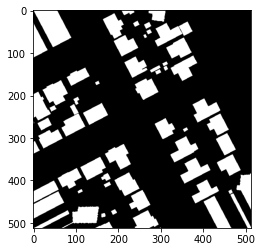

In [49]:

plt.imshow(y, cmap=plt.get_cmap('gray'))

In [46]:
x.shape

(512, 512, 3)

In [6]:
type(x)

NameError: name 'x' is not defined

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(x)  
plt.imshow(gray, cmap=plt.get_cmap('gray'))

NameError: name 'x' is not defined

In [ ]:
cv2.imread(x)

In [5]:
cv2.cvtColor(x , cv2.COLOR_RGB2GRAY )

NameError: name 'x' is not defined

In [68]:
cv2.cvtColor(x,  cv2.COLOR_BGR2RGB)

error: OpenCV(4.5.1) /tmp/pip-req-build-2mj8ejrk/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


In [ ]:
image_list[0][0]*255

os.path.join(out_train_data_dir + "/images/" ,"image_file_87.npy" )

os.path.isfile( os.path.join(out_train_data_dir + "/images/" ,"image_file_87.npy" ))

np.load(os.path.join( out_train_data_dir + "/images/" ,train_imgs[0] ) )

len(train_imgs)

image_list[0].shape

In [6]:
def subsample(features, labels, low, high, sample_size):

    idx = np.random.randint(low, high, sample_size)

    return features[idx], labels[idx]

def subsample_idx(low, high, sample_size):

    return np.random.randint(low,high,sample_size)

In [7]:
def calc_haralick(roi):

    feature_vec = []

    texture_features = mt.features.haralick(roi)
    mean_ht = texture_features.mean(axis=0)

    [feature_vec.append(i) for i in mean_ht[0:9]]

    return np.array(feature_vec)

In [8]:
def harlick_features(img, h_neigh, ss_idx):

    print ('[INFO] Computing haralick features.')
    size = h_neigh
    shape = (img.shape[0] - size + 1, img.shape[1] - size + 1, size, size)
    strides = 2 * img.strides
    patches = stride_tricks.as_strided(img, shape=shape, strides=strides)
    patches = patches.reshape(-1, size, size)

    if len(ss_idx) == 0 :
        bar = progressbar.ProgressBar(maxval=len(patches), \
        widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    else:
        bar = progressbar.ProgressBar(maxval=len(ss_idx), \
        widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

    bar.start()

    h_features = []

    if len(ss_idx) == 0:
        for i, p in enumerate(patches):
            bar.update(i+1)
            h_features.append(calc_haralick(p))
    else:
        for i, p in enumerate(patches[ss_idx]):
            bar.update(i+1)
            h_features.append(calc_haralick(p))

    #h_features = [calc_haralick(p) for p in patches[ss_idx]]

    return np.array(h_features)

In [9]:
def create_binary_pattern(img, p, r):

    print ('[INFO] Computing local binary pattern features.')
    lbp = feature.local_binary_pattern(img, p, r)
    return (lbp-np.min(lbp))/(np.max(lbp)-np.min(lbp)) * 255

In [70]:
img_gray2 = np.int64( rgb2gray(image_list2[0])  )

In [73]:
create_binary_pattern( img_gray2, 24*8, 24)

[INFO] Computing local binary pattern features.


array([[1.27500000e+02, 1.27500000e+02, 1.27500000e+02, ...,
        1.27500000e+02, 1.27500000e+02, 1.27500000e+02],
       [1.27500000e+02, 1.27500000e+02, 1.27500000e+02, ...,
        1.27500000e+02, 1.27500000e+02, 1.27500000e+02],
       [1.27500000e+02, 1.27500000e+02, 1.27500000e+02, ...,
        1.27500000e+02, 1.27500000e+02, 1.27500000e+02],
       ...,
       [1.26005859e+02, 1.09572256e+02, 7.17205093e+01, ...,
        1.27500000e+02, 1.27500000e+02, 1.27500000e+02],
       [7.57048843e+01, 1.51231885e-03, 1.43437606e+02, ...,
        1.27500000e+02, 1.27500000e+02, 1.27500000e+02],
       [1.43438579e+02, 1.27500091e+02, 1.27500213e+02, ...,
        1.27500000e+02, 1.27500000e+02, 1.27500000e+02]])

In [10]:
def create_features(img, img_gray, label, train=True):

    lbp_radius = 24 # local binary pattern neighbourhood
    h_neigh = 11 # haralick neighbourhood
    num_examples = 1000 # number of examples per image to use for training model

    lbp_points = lbp_radius*8
    h_ind = int((h_neigh - 1)/ 2)

    feature_img = np.zeros((img.shape[0],img.shape[1],4))
    feature_img[:,:,:3] = img
    img = None
    feature_img[:,:,3] = create_binary_pattern(img_gray, lbp_points, lbp_radius)
    feature_img = feature_img[h_ind:-h_ind, h_ind:-h_ind]
    features = feature_img.reshape(feature_img.shape[0]*feature_img.shape[1], feature_img.shape[2])

    if train == True:
        ss_idx = subsample_idx(0, features.shape[0], num_examples)
        features = features[ss_idx]
    else:
        ss_idx = []

    h_features = harlick_features(img_gray, h_neigh, ss_idx)
    features = np.hstack((features, h_features))

    if train == True:

        label = label[h_ind:-h_ind, h_ind:-h_ind]
        labels = label.reshape(label.shape[0]*label.shape[1], 1)
        labels = labels[ss_idx]
    else:
        labels = None

    return features, labels

In [11]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [12]:
def create_training_dataset(image_list, label_list):

    print ('[INFO] Creating training dataset on %d image(s).' %len(image_list))

    X = []
    y = []

    x = len(image_list)
    for i in range(x):
        #print(img.shape)
        #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_gray = np.int64( rgb2gray(image_list[i])  )
        features, labels = create_features(image_list[i], img_gray, label_list[i])
        X.append(features)
        y.append(labels)

    X = np.array(X)
    X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])
    y = np.array(y)
    y = y.reshape(y.shape[0]*y.shape[1], y.shape[2]).ravel()

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print ('[INFO] Feature vector size:', X.shape)

    #return X_train, X_test, y_train, y_test
    return X, y

In [13]:
def train_model(X, y, classifier):

    if classifier == "SVM":
        from sklearn.svm import SVC
        print ('[INFO] Training Support Vector Machine model.')
        model = SVC()
        model.fit(X, y)
    elif classifier == "RF":
        from sklearn.ensemble import RandomForestClassifier
        print ('[INFO] Training Random Forest model.')
        model = RandomForestClassifier(n_estimators=250, max_depth=12, random_state=42)
        model.fit(X, y)
    elif classifier == "GBC":
        from sklearn.ensemble import GradientBoostingClassifier
        model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
        model.fit(X, y)

    print ('[INFO] Model training complete.')
    print ('[INFO] Training Accuracy: %.2f' %model.score(X, y))
    return model

In [14]:
def test_model(X, y, model):

    pred = model.predict(X)
    precision = metrics.precision_score(y, pred, average='weighted', labels=np.unique(pred))
    recall = metrics.recall_score(y, pred, average='weighted', labels=np.unique(pred))
    f1 = metrics.f1_score(y, pred, average='weighted', labels=np.unique(pred))
    accuracy = metrics.accuracy_score(y, pred)
    iou_score = metrics.jaccard_score(y, pred )

    print ('--------------------------------')
    print ('[RESULTS] Accuracy: %.2f' %iou_score)
    print ('[RESULTS] Accuracy: %.2f' %accuracy)
    print ('[RESULTS] Precision: %.2f' %precision)
    print ('[RESULTS] Recall: %.2f' %recall)
    print ('[RESULTS] F1: %.2f' %f1)
    print ('--------------------------------')

In [15]:
def main(image_dir, label_dir, classifier, output_model):

    start = time.time()
    
    out_train_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/train'
    out_val_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/val'

    # ====================
    # train set
    # ====================
    train_imgs = [s for s in sorted(os.listdir(out_train_data_dir + "/images/")) if s.endswith('.npy')]
    train_masks = [s for s in sorted(os.listdir(out_train_data_dir + "/masks/")) if s.endswith('.npy')]

    # ====================
    # validation set
    # ====================
    val_imgs = [s for s in sorted(os.listdir(out_val_data_dir + "/images/")) if s.endswith('.npy')]
    val_masks = [s for s in sorted(os.listdir(out_val_data_dir + "/masks/")) if s.endswith('.npy')]

    image_list , label_list = read_data( train_imgs
                                    , out_train_data_dir + "/images/"
                                    , train_masks
                                    , out_train_data_dir + "/masks/"
                                   )
    
    #images = []
    #labels = []
    '''for i in range(0, len(val_image_list)): 
        image_list.append(val_image_list[i])
        label_list.append(val_label_list[i])'''
    
    X_train, y_train = create_training_dataset(image_list, label_list)    
    
    model = train_model(X_train, y_train, classifier)
    #pkl.dump(model, open(output_model, "wb"))
    
    val_image_list , val_label_list = read_data( val_imgs
                                            , out_val_data_dir + "/images/"
                                            , val_masks
                                            , out_val_data_dir + "/masks/"
                                           )
    
    X_test, y_test = create_training_dataset(val_image_list, val_label_list)
    
    test_model(X_test, y_test, model)
    print ('Processing time:',time.time()-start)

In [16]:
#def main(image_dir, label_dir, classifier, output_model):

start = time.time()

out_train_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/train'
out_val_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/val'

# ====================
# train set
# ====================
train_imgs = [s for s in sorted(os.listdir(out_train_data_dir + "/images/")) if s.endswith('.npy')]
train_masks = [s for s in sorted(os.listdir(out_train_data_dir + "/masks/")) if s.endswith('.npy')]

# ====================
# validation set
# ====================
val_imgs = [s for s in sorted(os.listdir(out_val_data_dir + "/images/")) if s.endswith('.npy')]
val_masks = [s for s in sorted(os.listdir(out_val_data_dir + "/masks/")) if s.endswith('.npy')]

'''image_list , label_list = read_data( train_imgs
                                , out_train_data_dir + "/images/"
                                , train_masks
                                , out_train_data_dir + "/masks/"
                               )'''

val_image_list , val_label_list = read_data( val_imgs
                                        , out_val_data_dir + "/images/"
                                        , val_masks
                                        , out_val_data_dir + "/masks/"
                                       )
#images = []
#labels = []
'''for i in range(0, len(val_image_list)): 
    image_list.append(val_image_list[i])
    label_list.append(val_label_list[i])'''

[INFO] Reading image data.


'for i in range(0, len(val_image_list)): \n    image_list.append(val_image_list[i])\n    label_list.append(val_label_list[i])'

In [158]:
len(image_list[:3])

3

In [180]:
image_list2 = image_list[:11]
label_list2 = label_list[:11]

In [186]:
dummy = int(4*2 )
image_list2[12].shape

IndexError: list index out of range

In [171]:
def g(tup):
    return create_training_dataset(*tup)

In [136]:
len(image_list2) // 3

4

In [137]:
train_len = len(image_list2) // 3
# image_list_inputs = [g(image_list2[:train_len] ,label_list2[:train_len])
#                      ,g(image_list2[train_len:train_len*2] ,label_list2[train_len:train_len*2])
#                      ,g(image_list2[train_len*2:train_len*3] ,label_list2[train_len*2:train_len*3])
#                      ,g(image_list2[train_len*3:train_len*4] ,label_list2[train_len*3:train_len*4])
#                      ,g(image_list2[-train_len:] ,label_list2[-train_len:])
#                     ]
image_list_inputs = [(image_list2[:train_len] ,label_list2[:train_len])
                     ,(image_list2[train_len:train_len*2] ,label_list2[train_len:train_len*2])
                     ,(image_list2[train_len*2:train_len*3] ,label_list2[train_len*2:train_len*3])
                     #,(image_list2[train_len*3:train_len*4] ,label_list2[train_len*3:train_len*4])
                     ,(image_list2[train_len:train_len*3:] ,label_list2[train_len:train_len*3:])
                    ]

In [149]:
len(image_list2[0])

512

In [139]:
job_args = [item for item in image_list_inputs] 

In [141]:
len(job_args[2][0])

4

In [29]:

pool = multiprocessing.Pool()
pool = multiprocessing.Pool(processes=5)
outputs = pool.map(create_training_dataset, job_args)
X_train, y_train = create_training_dataset(image_list, label_list) 

TypeError: create_training_dataset() missing 1 required positional argument: 'label_list'

In [ ]:
model = train_model(X_train, y_train, classifier)
pkl.dump(model, open(output_model, "wb"))

val_image_list , val_label_list = read_data( val_imgs
                                        , out_val_data_dir + "/images/"
                                        , val_masks
                                        , out_val_data_dir + "/masks/"
                                       )

X_test, y_test = create_training_dataset(val_image_list, val_label_list)    
test_model(X_test, y_test, model)

In [21]:
image_list2 = image_list[:5]
label_list2 = label_list[:5]

In [27]:
X_train, y_train = create_training_dataset(image_list2, label_list2)
#y_train, y_test = create_training_dataset(image_list, label_list)

model = train_model(X_train, y_train, "RF")
#pkl.dump(model, open(output_model, "wb"))


[INFO] Creating training dataset on 5 image(s).
[INFO] Computing local binary pattern features.


[INFO] Computing haralick features.


[INFO] Computing local binary pattern features.
[INFO] Computing haralick features.


[INFO] Computing local binary pattern features.


[INFO] Computing haralick features.


[INFO] Computing local binary pattern features.


[INFO] Computing haralick features.


[INFO] Computing local binary pattern features.


[INFO] Computing haralick features.


[INFO] Feature vector size: (5000, 13)
[INFO] Training Random Forest model.
[INFO] Model training complete.
[INFO] Training Accuracy: 0.98


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [50]:
def test_model(X, y, model):

    pred = model.predict(X)
    precision = metrics.precision_score(y, pred, average='weighted', labels=np.unique(pred))
    recall = metrics.recall_score(y, pred, average='weighted', labels=np.unique(pred))
    f1 = metrics.f1_score(y, pred, average='weighted', labels=np.unique(pred))
    accuracy = metrics.accuracy_score(y, pred)
    iou_score = metrics.jaccard_score(y, pred , average='weighted', labels=np.unique(pred)) 

    print ('--------------------------------')
    print ('[RESULTS] IOU_score: %.2f' %iou_score)
    print ('[RESULTS] Accuracy: %.2f' %accuracy)
    print ('[RESULTS] Precision: %.2f' %precision)
    print ('[RESULTS] Recall: %.2f' %recall)
    print ('[RESULTS] F1: %.2f' %f1)
    print ('--------------------------------')

In [39]:
pred = model.predict(X_train)

In [42]:
pred.shape

(5000,)

In [51]:
test_model(X_train, y_train, model)
print ('Processing time:',time.time()-start)

--------------------------------
[RESULTS] IOU_score: 0.96
[RESULTS] Accuracy: 0.98
[RESULTS] Precision: 0.98
[RESULTS] Recall: 0.98
[RESULTS] F1: 0.98
--------------------------------
Processing time: 1536.7443010807037


In [35]:
train_imgs[:4]

['image_file_1.npy',
 'image_file_10.npy',
 'image_file_11.npy',
 'image_file_12.npy']

In [34]:
model = train_model(X_train, y_train, "RF")

[INFO] Training Random Forest model.
[INFO] Model training complete.
[INFO] Training Accuracy: 0.95


In [35]:
test_model(X_test, y_test, model)

--------------------------------
[RESULTS] Accuracy: 0.85
[RESULTS] Precision: 0.81
[RESULTS] Recall: 0.85
[RESULTS] F1: 0.79
--------------------------------


In [44]:
image_list2[1].shape

(512, 512, 3)

In [69]:
len(X_train[:800])

800

In [72]:
X_train[:800].shape

(800, 13)

In [70]:
np.histogram(X_train[:800])

(array([10326,    47,    13,     7,     1,     3,     2,     0,     0,
            1]),
 array([    0.        ,  1342.98446064,  2685.96892128,  4028.95338192,
         5371.93784256,  6714.9223032 ,  8057.90676384,  9400.89122448,
        10743.87568512, 12086.86014576, 13429.8446064 ]))

In [62]:
len(X_test)

400

In [15]:
pred = model.predict(X_test )

NameError: name 'model' is not defined

In [75]:
pred_size = int(math.sqrt(X_test.shape[0]))

In [76]:
inference_img = pred.reshape(pred_size, pred_size)

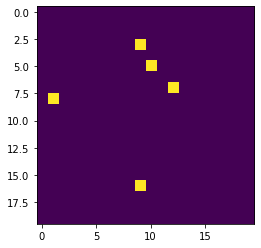

In [78]:
plt.imshow(inference_img)

In [14]:
out_train_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/train'
out_val_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/val'

# ====================
# train set
# ====================
train_imgs = [s for s in sorted(os.listdir(out_train_data_dir + "/images/")) if s.endswith('.npy')]
train_masks = [s for s in sorted(os.listdir(out_train_data_dir + "/masks/")) if s.endswith('.npy')]

# ====================
# validation set
# ====================
val_imgs = [s for s in sorted(os.listdir(out_val_data_dir + "/images/")) if s.endswith('.npy')]
val_masks = [s for s in sorted(os.listdir(out_val_data_dir + "/masks/")) if s.endswith('.npy')]

# image_list , label_list = read_data( train_imgs
#                                 , out_train_data_dir + "/images/"
#                                 , train_masks
#                                 , out_train_data_dir + "/masks/"
#                                )

val_image_list , val_label_list = read_data( val_imgs
                                        , out_val_data_dir + "/images/"
                                        , val_masks
                                        , out_val_data_dir + "/masks/"
                                       )

#for i in range(0, len(val_image_list)):  #use this for prod
# for i in range(0, 1): 
#     images = image_list.append(val_image_list[i])
#     labels = label_list.append(val_label_list[i])

[INFO] Reading image data.


In [ ]:
image_list2 = val_image_list[4][:10]

In [ ]:
label_list2 = val_label_list[4][:10]

In [ ]:
image_list2

In [54]:
plt.imshow(image_list2[4])

IndexError: list index out of range

In [58]:
len(val_image_list) * len(image_list)

2090193

In [57]:
len(image_list)

2891

In [33]:
image_list2 = val_image_list[5]
label_list2 = val_label_list[5]

In [38]:
len(image_list2)

512

In [24]:
len(image_list)

2891

In [38]:
image_list[0].shape

(512, 512, 3)

In [29]:
x = len(image_list)
for i in range(x):
    #print(img.shape)
    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = np.int64( rgb2gray(image_list[i])  )
    #features, labels = create_features(img, img_gray, label_list[i])

In [28]:
len(img_gray)

512

In [27]:
for i in range(3):
    img_gray = np.int64( rgb2gray( image_list[0] ) )#.shape
    print(img_gray.shape)

(512, 512)
(512, 512)
(512, 512)


In [ ]:
if __name__ == "__main__":
    #args = parse_args()
    image_dir =  None #args.image_dir
    label_dir = None #args.label_dir
    classifier = "RF" #args.classifier
    output_model = "/home/hgamarro/DeepLearning/JB_space/models/randomforest/randomforest1.pkl"
    main(image_dir, label_dir, classifier, output_model)

In [ ]:
model_trained = model

In [17]:
import cv2
import numpy as np
import pylab as plt
from glob import glob
import argparse
import os
import pickle as pkl
#import train
import math

def check_args(args):

    if not os.path.exists(args.image_dir):
        raise ValueError("Image directory does not exist")

    if not os.path.exists(args.output_dir):
        raise ValueError("Output directory does not exist")

    return args

def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("-i", "--image_dir" , help="Path to images", required=True)
    parser.add_argument("-m", "--model_path", help="Path to .p model", required=True)
    parser.add_argument("-o", "--output_dir", help="Path to output directory", required = True)
    args = parser.parse_args()
    return check_args(args)

def create_features2(img):
    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = np.int64( rgb2gray(img)  )

    #features, _ = train.create_features(img, img_gray, label=None, train=False)
    features, _ = create_features(img, img_gray, label=None, train=False)

    return features

def compute_prediction(img, model):

    border = 5 # (haralick neighbourhood - 1) / 2

    img = cv2.copyMakeBorder(img, top=border, bottom=border, \
                                  left=border, right=border, \
                                  borderType = cv2.BORDER_CONSTANT, \
                                  value=[0, 0, 0])

    features = create_features(img)
    predictions = model.predict(features.reshape(-1, features.shape[1]))
    pred_size = int(math.sqrt(features.shape[0]))
    inference_img = predictions.reshape(pred_size, pred_size)

    return inference_img

def infer_images(image_dir, model_path, output_dir):

    filelist = glob(os.path.join(image_dir,'*.jpg'))

    print ('[INFO] Running inference on %s test images' %len(filelist))

    model = pkl.load(open( model_path, "rb" ) )

    for file in filelist:
        print ('[INFO] Processing images:', os.path.basename(file))
        inference_img = compute_prediction(cv2.imread(file, 1), model)
        cv2.imwrite(os.path.join(output_dir, os.path.basename(file)), inference_img)

def main(image_dir, model_path, output_dir):

    infer_images(image_dir, model_path, output_dir)


In [ ]:
if __name__ == '__main__':
    args = parse_args()
    image_dir = args.image_dir
    model_path = args.model_path
    output_dir = args.output_dir
    main(image_dir, model_path, output_dir)

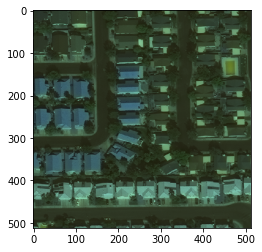

In [17]:
plt.imshow(val_image_list[10])

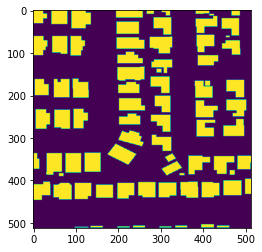

In [20]:
plt.imshow(val_label_list[10])

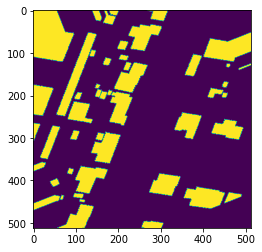

In [50]:
plt.imshow(label_list[6])

In [18]:
with open("/home/hgamarro/DeepLearning/JB_space/models/randomforest/randomforest1.pkl", 'rb') as f:
    model_trained = pkl.load(f)

In [19]:
border = 5 # (haralick neighbourhood - 1) / 2
img2 = val_image_list[10]
img = cv2.copyMakeBorder(img2, top=border, bottom=border, \
                              left=border, right=border, \
                              borderType = cv2.BORDER_CONSTANT, \
                              value=[0, 0, 0])

features = create_features2(img)
predictions = model_trained.predict(features.reshape(-1, features.shape[1]))
pred_size = int(math.sqrt(features.shape[0]))
inference_img = predictions.reshape(pred_size, pred_size)

[INFO] Computing local binary pattern features.


[INFO] Computing haralick features.


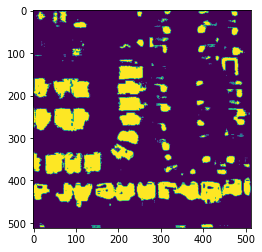

In [20]:
plt.imshow(inference_img)

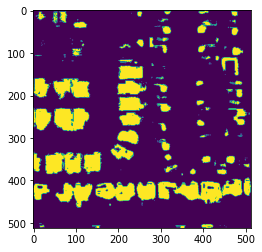

In [18]:
plt.imshow(inference_img)

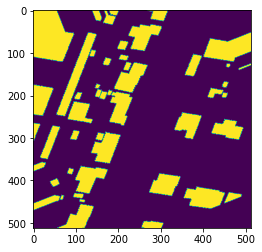

In [76]:
plt.imshow(label_list[6])

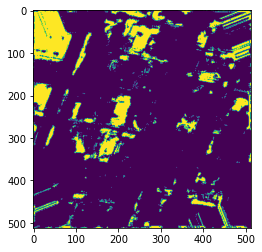

In [77]:
plt.imshow(inference_img)

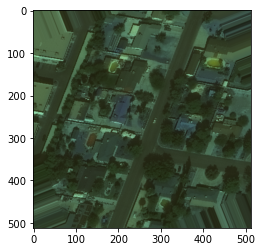

In [78]:
plt.imshow(image_list[6])

In [97]:
inference_img.shape

(512, 512)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=250, max_depth=12, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                    method = "predict_proba")

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

In [ ]:
y_scores_forest = y_probas_forest[:,1] # score = probab of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [ ]:
plt.plot(fpr, tpr, "b:", label="RF")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_prob_predict = (y_scores_forest > .5)

In [ ]:
precision_score(y_train_5, y_prob_predict)

In [ ]:
recall_score(y_train_5, y_prob_predict)

In [ ]:
y_probas_forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [ ]:
precision_score(y_train_5, y_probas_forest_pred)

In [ ]:
recall_score(y_train_5, y_probas_forest_pred)

In [ ]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

In [15]:
x=np.zeros((5,5,4))

In [14]:
x.reshape(-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
np.random.randint(0,3,5)

array([2, 2, 1, 2, 1])

In [ ]:

# Optimization
parameter_gridsearch = {
                 'max_depth' : [3, 4],  #depth of each decision tree
                 'n_estimators': [50, 20],  #count of decision tree
                 'max_features': ['sqrt', 'auto', 'log2'],      
                 'min_samples_split': [2],      
                 'min_samples_leaf': [1, 3, 4],
                 'bootstrap': [True, False],
                 }
# RF classification

randomforest = randomForestClassifier()
crossvalidation = StratifiedKFold(train[0::,0] , n_folds=5)

gridsearch = GridSearchCV(randomforest,             #grid search for algorithm optimization
                               scoring='accuracy',
                               param_grid=parameter_gridsearch,
                               cv=crossvalidation)


#gridsearch.fit(train[0::,1::], train[0::,0])    #train[0::,0] is as target
gridsearch.fit(train[0::,1::], train[0::,0])    #train[0::,0] is as target
model = gridsearch
parameters = gridsearch.best_params_